In [ ]:
from google.colab import files
uploaded = files.upload()

Saving derm.csv to derm.csv
Saving column_3C.csv to column_3C.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_paths = ['/content/column_3C.csv', '/content/derm.csv']

# Prompt the user to choose a file
print('Please choose a dataset to load:')
for i, file_path in enumerate(file_paths):
    print(f'{i+1}. {file_path}')

selection = int(input()) - 1
selected_file_path = file_paths[selection]


dados = pd.read_csv(selected_file_path, delimiter=',')

Please choose a dataset to load:
1. /content/column_3C.csv
2. /content/derm.csv
1


In [ ]:
# Uncoment this if the dataset is 2

dados = dados.dropna(subset=['age'])

**Execute o código abaixo caso escolha o dataset coluna vertebral**

In [ ]:
X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 16  # Choose the number of nodes in the hidden layer >>>> 2 coluna >>>>> 32 
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros(output_layer_size)

# Training the neural network using gradient descent
epochs = 500  # Choose the number of epochs to train for
learning_rate = 0.01  # Choose the learning rate for gradient descent

for i in range(epochs):
    # Forward propagation for the training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Backward propagation for the training set
    dz2_train = y_hat_train - y_train
    dW2_train = np.dot(a1_train.T, dz2_train)
    db2_train = np.sum(dz2_train, axis=0)
    da1_train = np.dot(dz2_train, W2.T) * a1_train * (1 - a1_train)
    dz1_train = da1_train
    dW1_train = np.dot(X_train.T, dz1_train)
    db1_train = np.sum(dz1_train, axis=0)

    # Updating the weights and biases
    W2 -= learning_rate * dW2_train
    b2 -= learning_rate * db2_train
    W1 -= learning_rate * dW1_train
    b1 -= learning_rate * db1_train
    

# Calculate the cross-entropy loss for the training set 
    train_loss = np.mean(-np.sum(y_train * np.log(y_hat_train), axis=1))

# Print the training and test loss after every 1000 epochs
    if i % 100 == 0:
      print(f"Epoch {i}: Train Loss = {train_loss:.4f}")


accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    z2_test = np.dot(a1_test, W2) + b2
    y_hat_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=1, keepdims=True)

    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

Epoch 0: Train Loss = 5.6355
Epoch 100: Train Loss = 0.0196
Epoch 200: Train Loss = 0.0090
Epoch 300: Train Loss = 0.0057
Epoch 400: Train Loss = 0.0042


**Execute o código abaixo caso escolha o dataset dermatologia**



In [ ]:
X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 10
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros(output_layer_size)

# Training the neural network using gradient descent
epochs = 500  # Choose the number of epochs to train for
learning_rate = 0.001  # Choose the learning rate for gradient descent

for i in range(epochs):
    # Forward propagation for the training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Backward propagation for the training set
    dz2_train = y_hat_train - y_train
    dW2_train = np.dot(a1_train.T, dz2_train)
    db2_train = np.sum(dz2_train, axis=0)
    da1_train = np.dot(dz2_train, W2.T) * a1_train * (1 - a1_train)
    dz1_train = da1_train
    dW1_train = np.dot(X_train.T, dz1_train)
    db1_train = np.sum(dz1_train, axis=0)

    # Updating the weights and biases
    W2 -= learning_rate * dW2_train
    b2 -= learning_rate * db2_train
    W1 -= learning_rate * dW1_train
    b1 -= learning_rate * db1_train
    

# Calculate the cross-entropy loss for the training set
    train_loss = np.mean(-np.sum(y_train * np.log(y_hat_train), axis=1))

# Print the training and test loss after every 1000 epochs
    if i % 100 == 0:
      print(f"Epoch {i}: Train Loss = {train_loss:.4f}")


accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    z2_test = np.dot(a1_test, W2) + b2
    y_hat_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=1, keepdims=True)

    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

Epoch 0: Train Loss = 1.9776
Epoch 100: Train Loss = 0.3845
Epoch 200: Train Loss = 0.3151
Epoch 300: Train Loss = 0.2852
Epoch 400: Train Loss = 0.2687


**Avaliar resultados de accuracia**

In [ ]:
accuracy_mean_train = np.mean(accuracy_values_train)
accuracy_mean_test = np.mean(accuracy_values_test)
accuracy_std_train = np.std(accuracy_values_train)
accuracy_std_test = np.std(accuracy_values_test)


df_results = pd.DataFrame({
      'Accuracy Mean': [accuracy_mean_train, accuracy_mean_test],
      'Accuracy Std': [accuracy_std_train, accuracy_std_test]
}, index=['Train', 'Test'])

df_results

,Accuracy Mean,Accuracy Std
Train,0.874516,0.008710
Test,0.872903,0.034839


In [ ]:
cm_train_sum = np.sum(cm_train_list, axis=0)
cm_test_sum = np.sum(cm_test_list, axis=0)

**Matriz de confusão coluna vertebral**

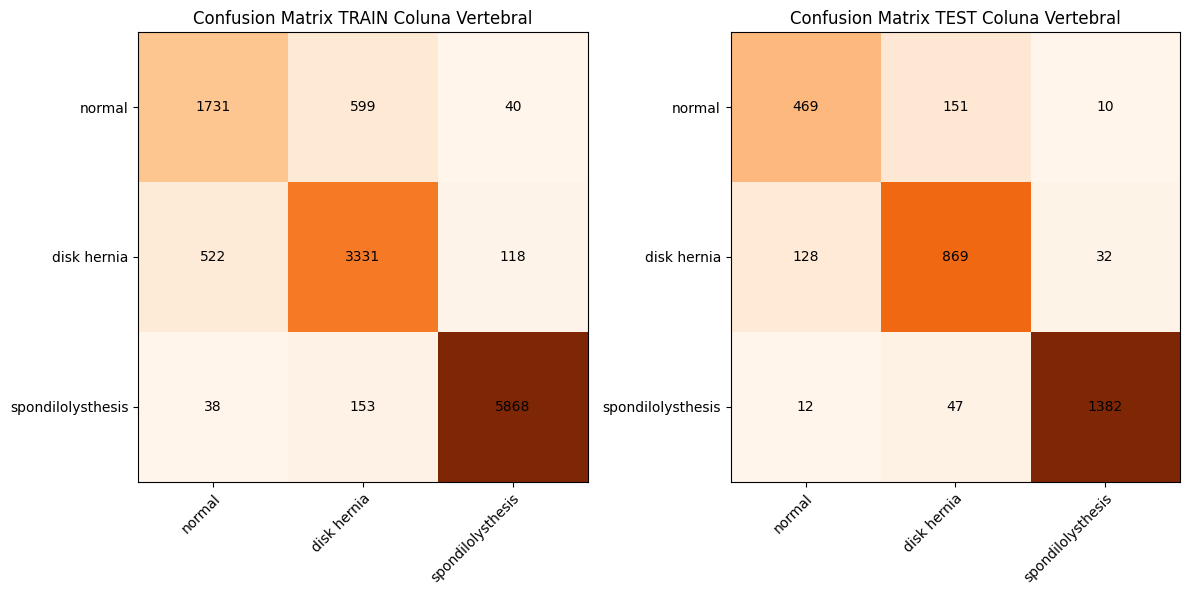

In [ ]:
target_names = ['normal', 'disk hernia', 'spondilolysthesis']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Coluna Vertebral")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Coluna Vertebral")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()

**Matriz de confusão dermatologia**


In [ ]:
target_names = ['Classe1','Classe2','Classe3','Classe4','Classe5','Clase6']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Dermatologia")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Dermatologia")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()